In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from params import InteriorParams
from utils.abs_coef import ABSORPTION

In [3]:
def lp_interior(lw,r,abs_eq,q=1):
    abs_eq = np.array(abs_eq)
    for i in range(len(abs_eq)): #Recorrer por frecuencia
        return lw + 10*np.log10((q/(4*np.pi*r**2))+4/abs_eq[i]) 

In [4]:
def distance_2d(x_point, y_point, x, y):
    return np.hypot(x-x_point, y-y_point)

In [5]:
def sum_matrix(matrix):
    result = np.zeros_like(matrix[0])
    for matrix in matrix:
        result+=matrix
    return result

In [6]:
SOURCE_POSITIONS = {'F1':(289782,6363955),
                    'F2':(289788,6363955),
                    'F3':(289782,6363979)}

SURFACE = InteriorParams.SURFACE

In [7]:
area_abs_eq = np.zeros(6)
for abs_eq in InteriorParams.MATERIALS.values():
    area_abs_eq += abs_eq.area_abs_eq

In [8]:
x_list = np.linspace(289772, 289792, 200)
y_list = np.linspace(6363952, 6363982, 300)
X, Y = np.meshgrid(x_list, y_list)

In [9]:
lp_sources = {key:np.zeros((8, 300, 200)) for key in SOURCE_POSITIONS}

In [10]:
for source, positions in SOURCE_POSITIONS.items():
    for i, lw in enumerate(InteriorParams.LW_FUENTES[source]):
        matrix = lp_sources[source]
        matrix[i] = lp_interior(lw, 
                                distance_2d(positions[0], positions[1], X, Y),
                                area_abs_eq)

In [11]:
lp_partial = np.array([10*np.log10(sum_matrix(10**(source/10))) for source in lp_sources.values()]) #Calcular valores en banda ancha

In [12]:
#lp_values = np.array([value[7] for value in lp_sources.values()]) #Calcular los valores para una frecuencia en particular

In [13]:
#lp_total = 10*np.log10(sum_matrix(10**(lp_values/10)))

In [14]:
lp_total = 10*np.log10(sum_matrix(10**(lp_partial/10)))

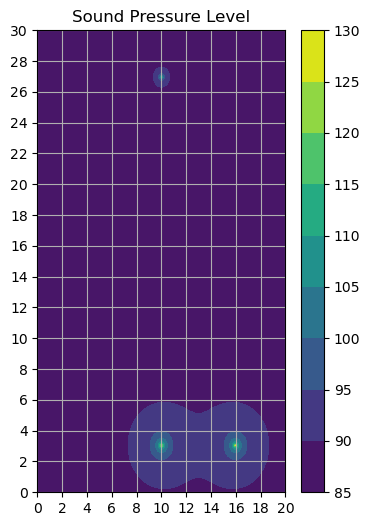

In [26]:
plt.figure(figsize=(4,6))
plt.title('Sound Pressure Level')
plt.contourf(lp_total, origin='lower')
plt.xticks(np.arange(0, 220, 20),np.arange(0, 22, 2))  # need to set the ticks manually
plt.yticks(np.arange(0, 320, 20),np.arange(0, 32, 2))
plt.colorbar()
plt.grid(True)